# Collecting the data using Twitter API and Analyzing the data.

In [2]:
!pip install tweepy

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler

In [4]:
# Keys from the Twitter API
consumer_key = "LzsCOl12ZZ79FObx7BV9a1R3a"
consumer_secret = "gODxZ1kHJHDGgYfyP12AUN37UTlDd6yn3OsSV9Tl0iwu0K0cRY"
access_token = "296102538-kYIK8SULCmRK4vgvYD2DhKbwvSXrgTdTkWh0Nvsp"
access_token_secret = "Ib9obwgcE5tZk4S6tY5rAqI5iXOeJc9FGFg28qHoa4YpP"

In [5]:
# Authentication
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [6]:
# Searching and getting the latest tweets about the query (Mumbai Indians will win IPL)
Tweets = api.search( "Mumbai Indians will win IPL" , count=10 , lang='en' , exclude='retweets' , tweet_mode='extended' )
for tweet in Tweets:
    print(tweet,"\n")
    print(".....................................\n")


Status(_api=<tweepy.api.API object at 0x0000000008803948>, _json={'created_at': 'Sun Nov 01 08:04:58 +0000 2020', 'id': 1322811857078415360, 'id_str': '1322811857078415360', 'full_text': '@mipaltan @MahelaJay @ImZaheer Mumbai Indians will win this IPL !', 'truncated': False, 'display_text_range': [31, 65], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'mipaltan', 'name': 'Mumbai Indians', 'id': 106345557, 'id_str': '106345557', 'indices': [0, 9]}, {'screen_name': 'MahelaJay', 'name': 'Mahela Jayawardena', 'id': 350334760, 'id_str': '350334760', 'indices': [10, 20]}, {'screen_name': 'ImZaheer', 'name': 'zaheer khan', 'id': 109275593, 'id_str': '109275593', 'indices': [21, 30]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1322810688213905412, 'in_reply_to_status_id_str': '1322810688213905412', 'in_repl

In [7]:
# Get the tweets and some Attributes in a dataframe
df = pd.DataFrame(columns = ['Tweets' , 'User' , 'User_statuses_count' , 
                            'User_followers' , 'User_location' , 'User_verified' ,
                            'fav_count' , 'rt_count' , 'tweet_date'] )
print(df)

Empty DataFrame
Columns: [Tweets, User, User_statuses_count, User_followers, User_location, User_verified, fav_count, rt_count, tweet_date]
Index: []


In [8]:
# function to fetch data using tweepy.Cursor and store the data (Max=1000 records)
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, exclude='retweets', lang='en').items():
        print('Tweets:',i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'User_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i = i+1
        if i == 1000:
            break
        else:
            pass

In [9]:
# Passing the search string and file name
stream(data=["Mumbai Indians will win IPL"] , file_name='MI_tweets')

In [10]:
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,@mipaltan @MahelaJay @ImZaheer Mumbai Indians ...,Kumar,41,0,,False,2,0,2020-11-01 08:04:58
1,Sunrisers Hyderabad have the upper hand as the...,Smriti Sinha,33951,2042,Somewhere I Belong,False,8,1,2020-10-31 17:35:26
2,Mumbai Indians will win this year IPL already ...,RISHABH SAHU,9,2,,False,0,0,2020-10-31 17:18:49
3,Delhi Capitals: We will win this match and top...,shubham2345,285,2,,False,0,0,2020-10-31 14:00:45
4,Mumbai Indians will win this year IPL,K.E.V.Y.N,14563,319,"Bengaluru, Karnataka",False,1,0,2020-10-31 13:01:56


In [11]:
# Function for cleaning the tweets using regular expression.
import re
def clean_tweet(tweet):
    tweet = re.sub('@\w+',' ', tweet)             # remove @mentions
    tweet = re.sub('\w+:\/\/\S+', ' ', tweet)      # remove links://...
    tweet = re.sub('[^0-9a-zA-Z \t]', ' ', tweet) # remove punctuation
    return tweet.strip()

In [13]:
!pip install TextBlob

In [14]:
# Function to analyze the sentiments 
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [15]:
# Cleaning the tweets
df['clean_tweet'] = df['Tweets'].apply(lambda x : clean_tweet(x))
df[['Tweets', 'clean_tweet']].head()

,Tweets,clean_tweet
0,@mipaltan @MahelaJay @ImZaheer Mumbai Indians ...,Mumbai Indians will win this IPL
1,Sunrisers Hyderabad have the upper hand as the...,Sunrisers Hyderabad have the upper hand as the...
2,Mumbai Indians will win this year IPL already ...,Mumbai Indians will win this year IPL already ...
3,Delhi Capitals: We will win this match and top...,Delhi Capitals We will win this match and top...
4,Mumbai Indians will win this year IPL,Mumbai Indians will win this year IPL


In [16]:
# Analyze the sentiments of the tweets
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x) )
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,Sentiment
0,@mipaltan @MahelaJay @ImZaheer Mumbai Indians ...,Kumar,41,0,,False,2,0,2020-11-01 08:04:58,Mumbai Indians will win this IPL,Positive
1,Sunrisers Hyderabad have the upper hand as the...,Smriti Sinha,33951,2042,Somewhere I Belong,False,8,1,2020-10-31 17:35:26,Sunrisers Hyderabad have the upper hand as the...,Positive
2,Mumbai Indians will win this year IPL already ...,RISHABH SAHU,9,2,,False,0,0,2020-10-31 17:18:49,Mumbai Indians will win this year IPL already ...,Positive
3,Delhi Capitals: We will win this match and top...,shubham2345,285,2,,False,0,0,2020-10-31 14:00:45,Delhi Capitals We will win this match and top...,Positive
4,Mumbai Indians will win this year IPL,K.E.V.Y.N,14563,319,"Bengaluru, Karnataka",False,1,0,2020-10-31 13:01:56,Mumbai Indians will win this year IPL,Positive


In [17]:
# Count of Positive, Neutral, Negative Tweets
print('Positive tweets:', df[df.Sentiment == 'Positive'].shape[0])
print('Neutral tweets:',  df[df.Sentiment == 'Neutral'].shape[0])
print('Negative tweets:', df[df.Sentiment == 'Negative'].shape[0])

Positive tweets: 113
Neutral tweets: 9
Negative tweets: 0


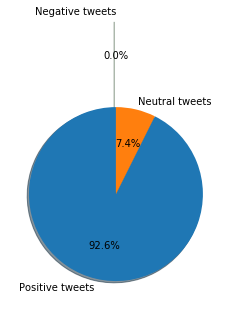

In [18]:
# Plotting the pie chart of the sentiments
import matplotlib.pyplot as plt
labels = 'Positive tweets', 'Neutral tweets', 'Negative tweets'
sizes = [df[df.Sentiment == 'Positive'].shape[0], df[df.Sentiment == 'Neutral'].shape[0], df[df.Sentiment == 'Negative'].shape[0]]
explode = (0, 0, 1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [19]:
# Analyze one specific record
n=0
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 @mipaltan @MahelaJay @ImZaheer Mumbai Indians will win this IPL !

Cleaned tweet:
 Mumbai Indians will win this IPL

Sentiment:
 Positive


In [20]:
# Analyze one specific record
n=5
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 #IPL2020 Updates MI win by 9 wickets; Kishan 72 not out. For Live scores click here  https://t.co/VCdDVhMCGL 

#MI… https://t.co/cYEdiVXvnT

Cleaned tweet:
 IPL2020 Updates MI win by 9 wickets  Kishan 72 not out  For Live scores click here       MI

Sentiment:
 Positive


In [21]:
# Storing the cleaned and analyzed data in the excel file
df.to_excel('{}.xlsx'.format('MI_tweets'))